# Worked Problem 2: Double Pendulum

## System Description

The double pendulum consists of two point masses connected by rigid rods. The first mass is connected to a pivot point, and the second mass is connected to the first mass. The system exhibits two degrees of freedom, represented by the angles  \theta_1  (angle of the first rod from the vertical) and  \theta_2  (angle of the second rod from the vertical). The double pendulum is a classic example of a chaotic system, where small changes in initial conditions can lead to drastically different outcomes.

**Variables**:

•	 $\theta_1$ : Angle of the first pendulum.

•	 $\theta_2$ : Angle of the second pendulum.

•	 $\dot{\theta_1}, \dot{\theta_2}$ : Angular velocities of the first and second pendulums.

**Parameters**:

•	 $m_1, m_2$ : Masses of the two pendulums.

•	 $L_1, L_2$ : Lengths of the rods.

•	 $g$ : Gravitational acceleration.


## Plan


**Objective**:

•	Investigate the chaotic dynamics of the double pendulum.

•	Analyze the stability of the system at its equilibrium points and examine how trajectories evolve over time in the phase space.

•	Use numerical integration to explore the system’s time evolution.

**Phase Space Analysis**:

•	Create a phase portrait with angular velocities $\dot{\theta_1}$  and  $\dot{\theta_2}$ plotted against angles $\theta_1$  and  $\theta_2$.
	
•	Identify and label any fixed points (e.g., both pendulums in vertical or horizontal positions).

**Stability of Fixed Points**:

•	Calculate the fixed points where  $\theta_1$  and  $\theta_2$  do not change over time (e.g., when both pendulums are perfectly aligned in the vertical down or up position).

•	Analyze the stability by linearizing the system near the fixed points and calculating eigenvalues of the Jacobian matrix at these points. Stable, unstable, and saddle points will be characterized.

**Numerical Integration**:

•	Use a numerical method (e.g., Runge-Kutta) to integrate the system of ODEs and find trajectories over time for given initial conditions.

•	Plot the resulting trajectories in the phase space to visualize chaotic behavior.

## Plotting Phase Potrait

**Defining the Lagrangian:**

We obtain the following lagrangian for the double pendulum system [^1] - 

$$
\mathcal{L} = \frac{1}{2} (m_1 + m_2) L_1^2 \dot{\theta}_1^2 + \frac{1}{2} m_2 L_2^2 \dot{\theta}_2^2 + m_2 L_1 L_2 \dot{\theta}_1 \dot{\theta}_2 \cos(\theta_1 - \theta_2) 
- (m_1 + m_2) g L_1 \cos \theta_1 - m_2 g L_2 \cos \theta_2
$$

where:

$$
\theta_1 = \text{the angular displacement of the first pendulum},
$$
$$
\theta_2 = \text{the angular displacement of the second pendulum},
$$
$$
L_1, L_2 = \text{the lengths of the rods of the first and second pendulum, respectively},
$$
$$
m_1, m_2 = \text{the masses of the first and second pendulum, respectively},
$$
$$
g = \text{the acceleration due to gravity}.
$$

Using this, we obtain the equations of motions as follows:

The equations of motion for the double pendulum system, derived from the Euler-Lagrange equations, are:

$$
(m_1 + m_2) L_1^2 \ddot{\theta}_1 + m_2 L_1 L_2 \left( -\sin(\theta_1 - \theta_2) (\dot{\theta}_1 - \dot{\theta}_2) \dot{\theta}_2 + \dot{\theta}_1 \ddot{\theta}_2 \right) + (m_1 + m_2) g L_1 \sin \theta_1 = 0
$$

$$
m_2 L_2^2 \ddot{\theta}_2 + m_2 L_1 L_2 \left( \dot{\theta}_1 (-\sin(\theta_1 - \theta_2)(\dot{\theta}_1 - \dot{\theta}_2)) + \dot{\theta}_2 \ddot{\theta}_1 \right) - m_2 g L_2 \sin \theta_2 = 0
$$

where:

$$
\theta_1, \theta_2 = \text{angular displacements of the pendulums},
$$
$$
L_1, L_2 = \text{the lengths of the rods of the first and second pendulum, respectively},
$$
$$
m_1, m_2 = \text{the masses of the first and second pendulum, respectively},
$$
$$
g = \text{the acceleration due to gravity}.
$$

## Functions

We now define the functions that we will use to compute the phase potrait, and calculate the trajectories for both pendulums. The inspiration for this code comes from the in-class activity done on September 10, 2024. 

In [53]:
import numpy as np
from scipy.integrate import solve_ivp, odeint

# Constants
L1, L2 = 1.0, 1.0   # Lengths of the pendulum rods
m1, m2 = 2.0, 2.0   # Masses of the pendulums
g = 9.81            # Gravitational acceleration

t_max = 10.0        # Maximum simulation time
t_span = [0, t_max]  # Time span for the simulation
t = np.linspace(0, t_max, 1000)  # Time points for the output

In [54]:
def DoublePendulumPhasePortrait(theta1, omega1, theta2, omega2):
    '''DoublePendulumPhasePortrait returns the time derivatives of the angles
    and angular velocities (i.e., the phase portrait) for the double pendulum'''
    
    # Common terms
    delta_theta = theta1 - theta2
    
    alpha_1 = (L2 / L1)*(m2/(m1+m2))*np.cos(delta_theta)
    alpha_2 = (L1 / L2)*np.cos(delta_theta)

    f_1 = -(L2 / L1)*(m2/(m1+m2))*np.sin(delta_theta)*omega2**2 - (g/L1)*np.sin(theta1)
    f_2 = (L1 / L2)*np.sin(delta_theta)*omega1**2 - (g/L2)*np.sin(theta2)
    
    # Compute theta1_dot and theta2_dot (angular velocities)
    theta1_dot = omega1
    theta2_dot = omega2
    
    # Compute omega1_dot (acceleration of theta1)
    omega1_dot = (f_1 - alpha_1*f_2) / (1 - alpha_1*alpha_2)
    # Compute omega2_dot (acceleration of theta2)
    omega2_dot = (f_2 - alpha_2*f_1) / (1 - alpha_1*alpha_2)

    return theta1_dot, omega1_dot, theta2_dot, omega2_dot

def ComputeDoublePendulumPhase(Theta1, Omega1, Theta2, Omega2):
    '''ComputeDoublePendulumPhase returns the changes in 
    the phase variables across a grid of locations for
    the double pendulum system'''

    ## Prep the arrays with zeros at the right size
    theta1_dot, omega1_dot = np.zeros(Theta1.shape), np.zeros(Omega1.shape)
    theta2_dot, omega2_dot = np.zeros(Theta2.shape), np.zeros(Omega2.shape)

    ## Set the limits of the loop based on how 
    ## many points in the arrays we have
    Xlim, Ylim = Theta1.shape
    
    ## Calculate the changes at each location and add them to the arrays
    for i in range(Xlim):
        for j in range(Ylim):
            # Extract local values of angles and angular velocities
            theta1_loc = Theta1[i, j]
            omega1_loc = Omega1[i, j]
            theta2_loc = Theta2[i, j]
            omega2_loc = Omega2[i, j]
            
            # Compute phase portrait using DoublePendulumPhasePortrait function
            theta1_dot[i, j], omega1_dot[i, j], theta2_dot[i, j], omega2_dot[i, j] = DoublePendulumPhasePortrait(
                theta1_loc, omega1_loc, theta2_loc, omega2_loc
            )
    
    return theta1_dot, omega1_dot, theta2_dot, omega2_dot

def DoublePendulumTrajectory(theta1_0, omega1_0, theta2_0, omega2_0):
    '''DoublePendulumTrajectory computes the phase space
    trajectory using numerical integration for the double pendulum system.'''

    # Define the system of ODEs using the DoublePendulumPhasePortrait function
    def equations_of_motion(t, y):
        theta1, omega1, theta2, omega2 = y
        
        # Call the DoublePendulumPhasePortrait function to get the time derivatives
        theta1_dot, omega1_dot, theta2_dot, omega2_dot = DoublePendulumPhasePortrait(
            theta1, omega1, theta2, omega2)

        return [theta1_dot, omega1_dot, theta2_dot, omega2_dot]

    # Initial conditions: [theta1, omega1, theta2, omega2]
    y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

    # Integrate the system of ODEs using odeint
    solution = solve_ivp(equations_of_motion, t_span, y0, method='RK45', t_eval=t)
    
    theta1_traj, omega1_traj = solution.y[0], solution.y[1]
    theta2_traj, omega2_traj = solution.y[2], solution.y[3]

    return theta1_traj, omega1_traj, theta2_traj, omega2_traj

## Plotting Phase Potraits

Now that we have defined our functions, we will use them to get a plot of our phase potraits for both pendulums. We define the parameters - the length and mass of the pendulum rods and the gravitational constant. For simplicity, we are considering $L_1 = L_2 = 1$ and $m_1 = m_2 = 1$.

We then define arrays to initialize $\theta_1, \theta_2, \omega_1$, and $\omega_2$. Using these arrays, we create corresponding meshgrids used for plotting. Using the functions, we are then able to calculate the trajectories of each pendulum. The first plot shows a quiver and stream potrait for the first pendulum. The second plot does the same for the second pendulum.

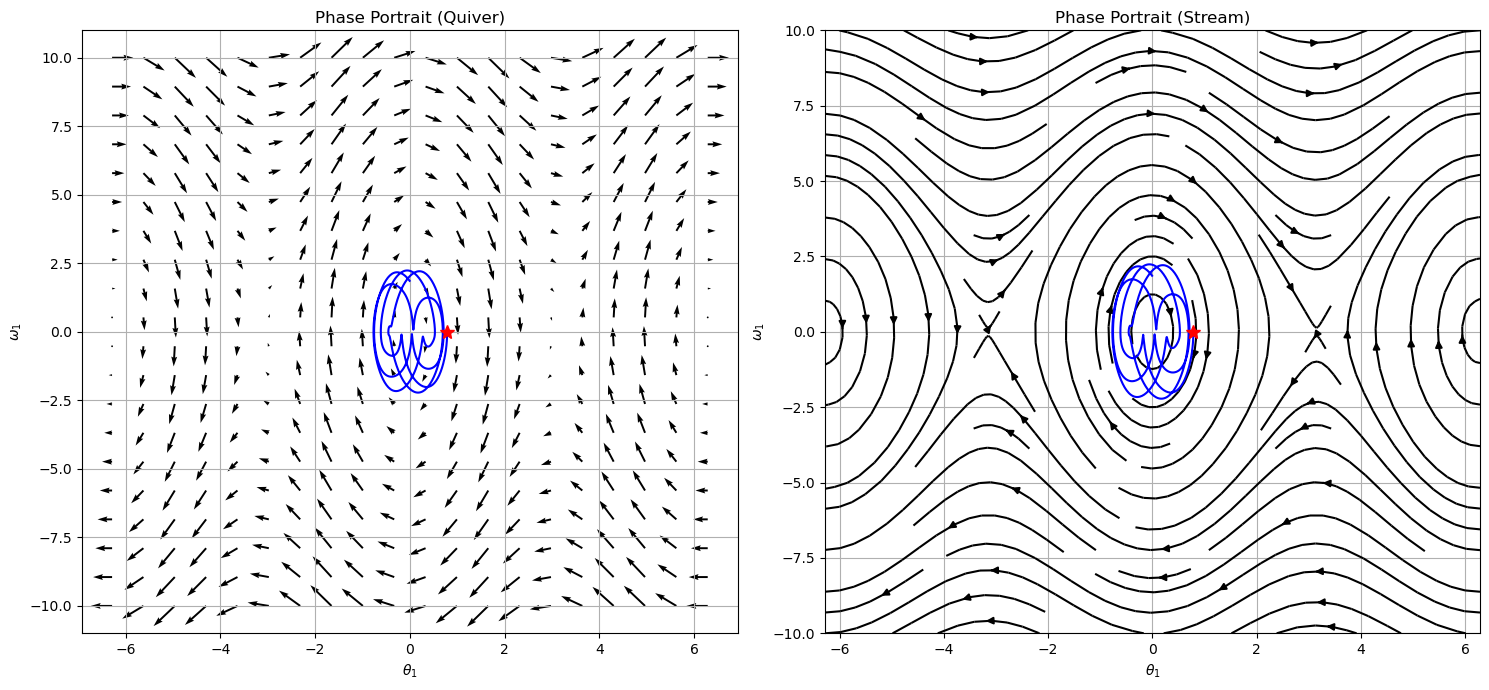

In [55]:
import matplotlib.pyplot as plt


# Phase space variables: theta1, omega1, theta2, omega2
theta1_vals = np.linspace(-2*np.pi, 2*np.pi, 20)
omega1_vals = np.linspace(-10, 10, 20)
theta2_vals = np.linspace(-2*np.pi, 2*np.pi, 20)
omega2_vals = np.linspace(-10, 10, 20)

# Create a meshgrid for the phase space variables (for theta1 and omega1)
THETA1, OMEGA1 = np.meshgrid(theta1_vals, omega1_vals)
THETA2, OMEGA2 = np.meshgrid(theta2_vals, omega2_vals)

# Generate the phase space portrait using the phase portrait function
THETA1_dot, OMEGA1_dot, THETA2_dot, OMEGA2_dot = ComputeDoublePendulumPhase(
    THETA1, OMEGA1, THETA2, OMEGA2
)

# Initial conditions for the trajectory plot
theta1_0 = np.pi / 4
omega1_0 = 0.0
theta2_0 = np.pi / 6
omega2_0 = 0.0

# Compute the trajectory of the double pendulum using numerical integration
trajectory = DoublePendulumTrajectory(theta1_0, omega1_0, theta2_0, omega2_0)
theta1_traj, omega1_traj, theta2_traj, omega2_traj = trajectory

# Plotting the phase portrait and the trajectory
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1: Quiver plot of the phase space portrait
ax[0].quiver(THETA1, OMEGA1, THETA1_dot, OMEGA1_dot, color='k')
ax[0].plot(theta1_traj, omega1_traj, color='b')  # Trajectory
ax[0].plot(theta1_0, omega1_0, 'r*', markersize=10)  # Starting point

ax[0].set_xlabel(r'$\theta_1$')
ax[0].set_ylabel(r'$\omega_1$')
ax[0].set_title("Phase Portrait (Quiver)")
ax[0].grid(True)

# Subplot 2: Stream plot of the phase space portrait
ax[1].streamplot(THETA1, OMEGA1, THETA1_dot, OMEGA1_dot, color='k')
ax[1].plot(theta1_traj, omega1_traj, color='b')  # Trajectory
ax[1].plot(theta1_0, omega1_0, 'r*', markersize=10)  # Starting point

ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$\omega_1$')
ax[1].set_title("Phase Portrait (Stream)")
ax[1].grid(True)

plt.tight_layout()
plt.show()

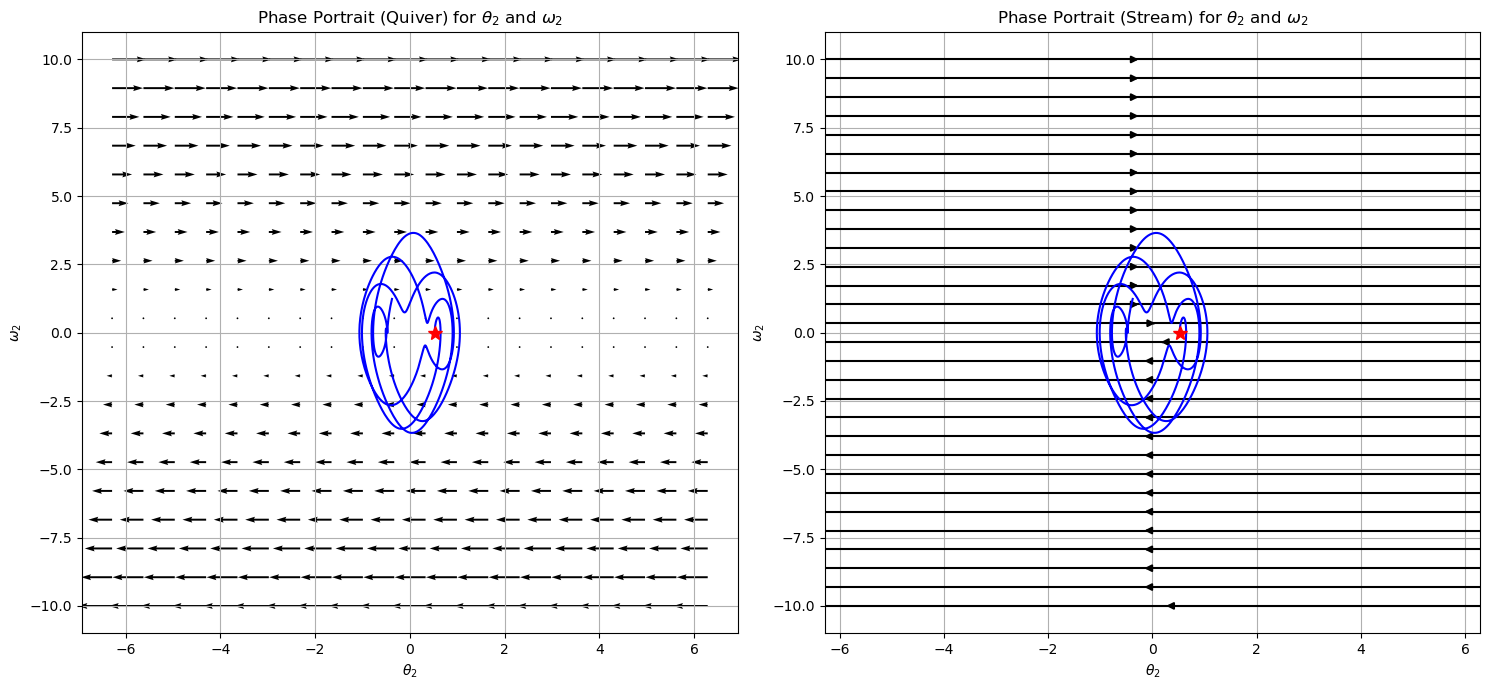

In [56]:
# Plotting the phase portrait and the trajectory for theta2 and omega2
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1: Quiver plot of the phase space portrait
ax[0].quiver(THETA2, OMEGA2, THETA2_dot, OMEGA2_dot, color='k')
ax[0].plot(theta2_traj, omega2_traj, color='b')  # Trajectory
ax[0].plot(theta2_0, omega2_0, 'r*', markersize=10)  # Starting point

ax[0].set_xlabel(r'$\theta_2$')
ax[0].set_ylabel(r'$\omega_2$')
ax[0].set_title("Phase Portrait (Quiver) for $\\theta_2$ and $\\omega_2$")
ax[0].grid(True)

# Subplot 2: Stream plot of the phase space portrait
ax[1].streamplot(THETA2, OMEGA2, THETA2_dot, OMEGA2_dot, color='k')
ax[1].plot(theta2_traj, omega2_traj, color='b')  # Trajectory
ax[1].plot(theta2_0, omega2_0, 'r*', markersize=10)  # Starting point

ax[1].set_xlabel(r'$\theta_2$')
ax[1].set_ylabel(r'$\omega_2$')
ax[1].set_title("Phase Portrait (Stream) for $\\theta_2$ and $\\omega_2$")
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Interpreting the Phase Potrait

In the image provided, two types of phase portraits are plotted for the double pendulum system:

1.	Left Plot (Quiver Plot):
•	This shows the direction and magnitude of angular velocities $\dot{\theta_1}, \dot{\omega_1}$ in the phase space.

•	The arrows represent the instantaneous rates of change for $\theta_1$ and $\omega_1$.

•	The blue curve represents a trajectory (the system’s evolution over time), starting from the initial conditions marked by the red star.

•	The behavior near the origin shows oscillatory behavior, indicating periodic motion near the equilibrium point.


2.	Right Plot (Stream Plot):
•	The stream plot shows the flow lines of the system.

•	The curves again represent possible trajectories that a pendulum can follow, given initial conditions.

•	It confirms the same behavior shown by the quiver plot, with an oscillatory pattern near the origin.

•	The fixed point at the center corresponds to an equilibrium point where the pendulum is at rest.


**Fixed Points**: From the phase portrait, we see a fixed point at the origin $(0, 0)$, where $\theta_1 = 0$ and $\omega_1 = 0$, indicating that the pendulum is hanging straight down at rest. This is a stable equilibrium in the linearized system (small angle approximation).

**Solution Families**:
	•	The system appears to show periodic solutions (closed loops) around the origin, which is typical for simple harmonic motion or small-angle approximations. The fixed point at the center represents a stable point.


The same analysis is repeated for pendulum 2.

## Finding Stability of Fixed Point

As discussed above, the fixed point is when both pendulums point straight down, i.e when $\theta_1 = \theta_2 = \omega_1 = \omega_2 = 0$. As discussed in the in-class activity for Sept 10, we now calculate the Jacobian matrix at the fixed point to learn more about the stability of the fixed point. The following code builds said Jacobian and calculates its eignevalues.

In [59]:
import numpy as np
from sympy import symbols, Matrix, cos, sin

# Define symbols for theta1, omega1, theta2, omega2
theta1, omega1, theta2, omega2 = symbols('theta1 omega1 theta2 omega2')
L1, L2, m1, m2, g = symbols('L1 L2 m1 m2 g')

# Define the equations of motion
delta_theta = theta1 - theta2

alpha_1 = (L2 / L1)*(m2/(m1+m2))*cos(delta_theta)
alpha_2 = (L1 / L2)*cos(delta_theta)

f_1 = -(L2 / L1)*(m2/(m1+m2))*sin(delta_theta)*omega2**2 - (g/L1)*sin(theta1)
f_2 = (L1 / L2)*sin(delta_theta)*omega1**2 - (g/L2)*sin(theta2)

# Compute omega1_dot (acceleration of theta1)
omega1_dot = (f_1 - alpha_1*f_2) / (1 - alpha_1*alpha_2)
# Compute omega2_dot (acceleration of theta2)
omega2_dot = (f_2 - alpha_2*f_1) / (1 - alpha_1*alpha_2)

# Define the system of first-order ODEs
eqns = [omega1, omega1_dot, omega2, omega2_dot]

# Create a vector of the variables
variables = [theta1, omega1, theta2, omega2]

# Compute the Jacobian matrix
J = Matrix(eqns).jacobian(variables)

# Evaluate the Jacobian at the fixed point (theta1 = theta2 = 0, omega1 = omega2 = 0)
fixed_point_subs = {theta1: 0, theta2: 0, omega1: 0, omega2: 0}
J_at_fixed = J.subs(fixed_point_subs)

# Print the Jacobian at the fixed point
print(J_at_fixed)

Matrix([[0, 1, 0, 0], [-g/(L1*(-m2/(m1 + m2) + 1)), 0, g*m2/(L1*(m1 + m2)*(-m2/(m1 + m2) + 1)), 0], [0, 0, 0, 1], [g/(L2*(-m2/(m1 + m2) + 1)), 0, -g/(L2*(-m2/(m1 + m2) + 1)), 0]])


In [63]:
from numpy.linalg import eigvals

# Define numerical values for the constants
L1_val = 1.0
L2_val = 1.0
m1_val = 1.0
m2_val = 1.0
g_val = 9.81

# Substitute numerical values into the symbolic Jacobian matrix
J_numeric = J_at_fixed.subs({
    L1: L1_val,
    L2: L2_val,
    m1: m1_val,
    m2: m2_val,
    g: g_val
})

# Convert the symbolic Jacobian to a numerical matrix (assuming some values for constants)
J_numeric = np.array(J_numeric).astype(np.float64)

# Calculate the eigenvalues
eigenvalues = eigvals(J_numeric)

# Print the eigenvalues to classify stability
print("Eigenvalues:", eigenvalues)

# Print the real part of each eigenvalue
real_parts = np.real(eigenvalues)
print("Real parts of the eigenvalues:", real_parts)

Eigenvalues: [-1.14324220e-15+5.7873513j -1.14324220e-15-5.7873513j
  3.58210191e-17+2.3971994j  3.58210191e-17-2.3971994j]
Real parts of the eigenvalues: [-1.14324220e-15 -1.14324220e-15  3.58210191e-17  3.58210191e-17]


## Interpretation of Stability

As we can see, the eigenvalues are purely imaginary, which means the fixed point is a center.

## Bibliography

1. I got the Lagrangian from this very nice article online: 'Double pendulum: Lagrangian formulation', https://dassencio.org/33/

2. I repurposed the functions given in the in-class activity for Sep. 10 - 1 - The Dynamical Systems Approach and Phase Portraits.